In [133]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Creare un oggetto SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Definire una funzione per ottenere il sentiment di un testo
def get_sentiment(text):
    # Calcolare il sentiment score del testo
    scores = sid.polarity_scores(text)
    # Determinare il sentiment sulla base del compound score
    if scores['compound'] >= 0.05:
        return 'positivo'
    elif scores['compound'] <= -0.05:
        return 'negativo'
    else:
        return 'neutro'

# Esempio di utilizzo
testo = "Questo è un testo molto positivo e piacevole."
sentiment = get_sentiment(testo)
print("Sentiment del testo:", sentiment)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/giuseppe/nltk_data...


Sentiment del testo: neutro


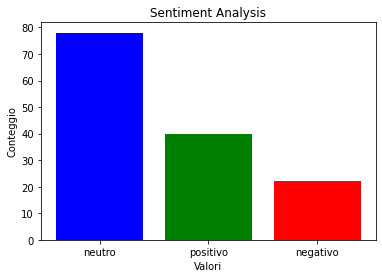

In [138]:
import matplotlib.pyplot as plt


# Conta i valori unici nella colonna
conteggio_valori = df['sentiment'].value_counts()

# Crea un grafico a barre

colori = {'positivo': 'green', 'negativo': 'red', 'neutro': 'blue'}

# Crea un grafico a barre utilizzando i colori definiti
plt.bar(conteggio_valori.index, conteggio_valori.values, color=[colori[valore] for valore in conteggio_valori.index])


# Aggiungi titoli e label
plt.xlabel('Valori')
plt.ylabel('Conteggio')
plt.title('Sentiment Analysis')

# Mostra il grafico
plt.show()


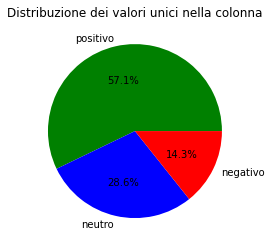

In [139]:
import pandas as pd
import matplotlib.pyplot as plt

# Esempio di DataFrame con una colonna chiamata "colonna"
data = {
    'colonna': ['positivo', 'negativo', 'positivo', 'neutro', 'positivo', 'neutro', 'positivo']
}

df = pd.DataFrame(data)

# Conta i valori unici nella colonna
conteggio_valori = df['colonna'].value_counts()

# Definisci i colori per ciascuna categoria
colori = {'positivo': 'green', 'negativo': 'red', 'neutro': 'blue'}

# Crea un grafico a torta utilizzando i colori definiti
plt.pie(conteggio_valori, labels=conteggio_valori.index, colors=[colori[valore] for valore in conteggio_valori.index], autopct='%1.1f%%')

# Aggiungi titolo
plt.title('Distribuzione dei valori unici nella colonna')

# Mostra il grafico
plt.show()


In [ ]:

import requests
from bs4 import BeautifulSoup
import pandas as pd

# Numero di pagine da analizzare
page_start = 1
page_end = 49

# DataFrame per memorizzare i dati
#df = pd.DataFrame(columns=["titolo", "testo"])

# Ciclo attraverso le pagine
for page_num in range(page_start, page_end + 1):
    # Costruisci l'URL per la pagina corrente
    url = f'https://it.trustpilot.com/review/www.fitactive.it?page={page_num}'

    # Effettua la richiesta HTTP per ottenere il contenuto della pagina
    response = requests.get(url)
    if response.status_code == 200:
        # Utilizza BeautifulSoup per analizzare l'HTML della pagina
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Trova tutti gli elementi di recensione
        reviews = soup.find_all(attrs={"data-review-content": True})

        # Estrai titolo e testo di ciascuna recensione e aggiungili al DataFrame
        for review in reviews:
            title_element = review.find(attrs={"data-service-review-title-typography": True})
            content_element = review.find(attrs={"data-service-review-text-typography": True})

            if title_element and content_element:
                title = title_element.text
                content = content_element.text
                # Aggiungi i dati al DataFrame
                df = df.append({"titolo": title, "testo": content}, ignore_index=True)
            else:
                print("Elemento titolo o testo non trovato.")

# Stampiamo il DataFrame con tutti i dati delle recensioni
df


In [183]:
df

,titolo,testo
0,Tutto eccellente,Mi sono iscritta l’anno scorso con il mio fida...
1,Sospendono abbonamento senza motivo,Fit Active Canonici di Bergamo mi ha sospeso l...
2,Oltre le aspettative,Frequento la palestra di Castelfranco V.to (TV...
3,Mario,"Mario: vasta gamma di corsi, servizi, bevande ..."
4,Un Paradiso Fitness: Esperienza Cinque Stelle,La palestra offre un ambiente pulito e moderno...
...,...,...
1296,VERGOGNA,"La struttura e gli attrezzi sono validi, ma la..."
1297,Iscritta da un mese circa,"Iscritta da un mese circa, frequento la sede ..."
1298,OTTIME PALESTRE,OTTIME PALESTREFrequento 2 palestre (Pero e Pe...
1299,tutti i giorni passo davanti la…,tutti i giorni passo davanti la palestra di ge...


In [184]:

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Creare un oggetto SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Definire una funzione per ottenere il sentiment di un testo
def get_sentiment(text):
    # Calcolare il sentiment score del testo
    scores = sid.polarity_scores(text)
    # Determinare il sentiment sulla base del compound score
    if scores['compound'] >= 0.05:
        return 'positivo'
    elif scores['compound'] <= -0.05:
        return 'negativo'
    else:
        return 'neutro'

# Esempio di utilizzo
testo = "Questo è un testo molto positivo e piacevole."
sentiment = get_sentiment(testo)
print("Sentiment del testo:", sentiment)

df['sentiment'] = df['testo'].apply(get_sentiment)

df

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/giuseppe/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment del testo: neutro


,titolo,testo,sentiment
0,Tutto eccellente,Mi sono iscritta l’anno scorso con il mio fida...,positivo
1,Sospendono abbonamento senza motivo,Fit Active Canonici di Bergamo mi ha sospeso l...,positivo
2,Oltre le aspettative,Frequento la palestra di Castelfranco V.to (TV...,neutro
3,Mario,"Mario: vasta gamma di corsi, servizi, bevande ...",neutro
4,Un Paradiso Fitness: Esperienza Cinque Stelle,La palestra offre un ambiente pulito e moderno...,positivo
...,...,...,...
1296,VERGOGNA,"La struttura e gli attrezzi sono validi, ma la...",neutro
1297,Iscritta da un mese circa,"Iscritta da un mese circa, frequento la sede ...",neutro
1298,OTTIME PALESTRE,OTTIME PALESTREFrequento 2 palestre (Pero e Pe...,neutro
1299,tutti i giorni passo davanti la…,tutti i giorni passo davanti la palestra di ge...,neutro


In [160]:
df

,titolo,testo,sentiment
0,Tutto eccellente,Mi sono iscritta l’anno scorso con il mio fida...,positivo
1,Sospendono abbonamento senza motivo,Fit Active Canonici di Bergamo mi ha sospeso l...,positivo
2,Oltre le aspettative,Frequento la palestra di Castelfranco V.to (TV...,neutro
3,Mario,"Mario: vasta gamma di corsi, servizi, bevande ...",neutro
4,Un Paradiso Fitness: Esperienza Cinque Stelle,La palestra offre un ambiente pulito e moderno...,positivo
...,...,...,...
135,Iscrizione,Mi sono iscritta dopo il mio compagno che si e...,negativo
136,Ottima palestra,Ottima palestra. Pulita e ordinata. Buona orga...,neutro
137,Buona palestra,"Luogo molto pulito, ampia scelta di macchinari...",positivo
138,Sono iscritta in Fitactive da un anno.,Sono iscritta in Fitactive da un anno.Fin da s...,positivo


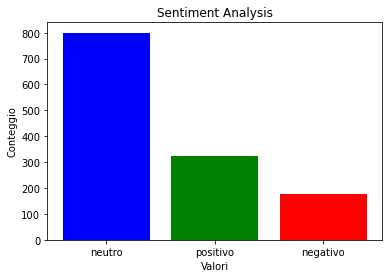

In [185]:

import matplotlib.pyplot as plt


# Conta i valori unici nella colonna
conteggio_valori = df['sentiment'].value_counts()

# Crea un grafico a barre

colori = {'positivo': 'green', 'negativo': 'red', 'neutro': 'blue'}

# Crea un grafico a barre utilizzando i colori definiti
plt.bar(conteggio_valori.index, conteggio_valori.values, color=[colori[valore] for valore in conteggio_valori.index])


# Aggiungi titoli e label
plt.xlabel('Valori')
plt.ylabel('Conteggio')
plt.title('Sentiment Analysis')

# Mostra il grafico
plt.show()


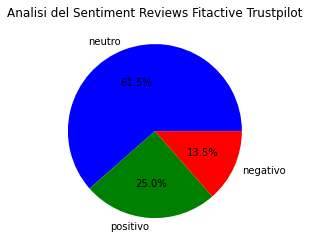

In [189]:
import matplotlib.pyplot as plt

# Conta i valori unici nella colonna 'sentiment'
conteggio_valori = df['sentiment'].value_counts()

# Definisci i colori per ciascuna categoria
colori = {'positivo': 'green', 'negativo': 'red', 'neutro': 'blue'}

# Crea un grafico a torta utilizzando i colori definiti
plt.pie(conteggio_valori, labels=conteggio_valori.index, colors=[colori[valore] for valore in conteggio_valori.index], autopct='%1.1f%%')

# Aggiungi titolo
plt.title('Analisi del Sentiment Reviews Fitactive Trustpilot')

# Mostra il grafico
plt.show()
